# Heuristic Models For Seattle Weather

In [1]:
# import packges 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import time
import datetime

In [2]:
# Load Data
df = pd.read_csv('https://raw.githubusercontent.com/Yasmeenmad/data_science_bootcamp/main/Week10/Intro_Machine_Learning1/seattle_weather_1948-2017.csv')

In [3]:
df.head()

,DATE,PRCP,TMAX,TMIN,RAIN
0,1948-01-01,0.47,51,42,True
1,1948-01-02,0.59,45,36,True
2,1948-01-03,0.42,45,35,True
3,1948-01-04,0.31,45,34,True
4,1948-01-05,0.17,45,32,True


In [4]:
df.describe()

,PRCP,TMAX,TMIN
count,25548.000000,25551.000000,25551.000000
mean,0.106222,59.544206,44.514226
std,0.239031,12.772984,8.892836
min,0.000000,4.000000,0.000000
25%,0.000000,50.000000,38.000000
50%,0.000000,58.000000,45.000000
75%,0.100000,69.000000,52.000000
max,5.020000,103.000000,71.000000


In [5]:
df[df['RAIN']== True].describe()

,PRCP,TMAX,TMIN
count,10900.000000,10900.000000,10900.000000
mean,0.248968,53.779541,43.071101
std,0.313661,8.726041,7.405569
min,0.010000,4.000000,6.000000
25%,0.050000,48.000000,38.000000
50%,0.140000,53.000000,43.000000
75%,0.330000,59.000000,48.000000
max,5.020000,96.000000,65.000000


### Create functions to handle NaN values

In [6]:
def RAIN_INSERTION(cols):
    """
    Insert False where NaN values are present
    """
    RAIN=cols[0]
    if pd.isnull(RAIN):
        return False
    else:
        return RAIN

In [7]:
def PRCP_INSERTION(col):
    """
    Insert the Mean of PRCP where NaN values are present
    """
    PRCP=col[0]
    if pd.isnull(PRCP):
        return df['PRCP'].mean()
    else:
        return PRCP

In [8]:
# Apply the functions
df['RAIN']=df[['RAIN']].apply(RAIN_INSERTION,axis=1)

In [9]:
df['PRCP']=df[['PRCP']].apply(PRCP_INSERTION,axis=1)

In [10]:
# Check for NaN values
df[pd.isnull(df['RAIN'])]

,DATE,PRCP,TMAX,TMIN,RAIN


In [11]:
df[pd.isnull(df['PRCP'])]

,DATE,PRCP,TMAX,TMIN,RAIN


## EDA

Text(0.5, 1.0, 'Precipitation Vs Minimum Temperature')

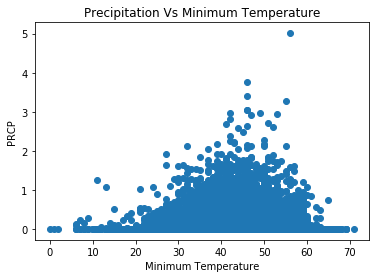

In [12]:
plt.scatter(x='TMIN',y='PRCP',data=df)
plt.xlabel('Minimum Temperature')
plt.ylabel('PRCP')
plt.title('Precipitation Vs Minimum Temperature')

Text(0.5, 1.0, 'Precipitation Vs Maximum Temperature')

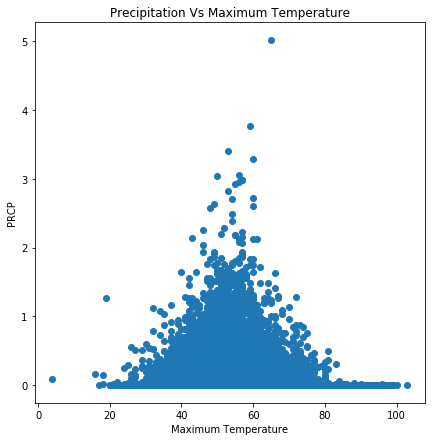

In [13]:
plt.figure(figsize=(7,7))
plt.scatter(x='TMAX',y='PRCP',data=df)
plt.xlabel('Maximum Temperature')
plt.ylabel('PRCP')
plt.title('Precipitation Vs Maximum Temperature')


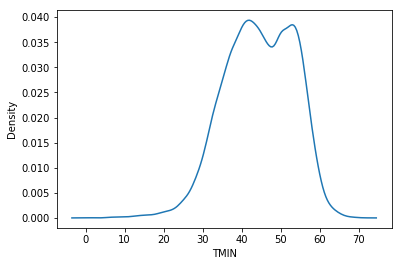

In [14]:
sns.kdeplot(df['TMIN'])

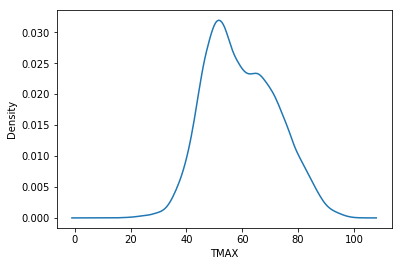

In [15]:
sns.kdeplot(df['TMAX'])

<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


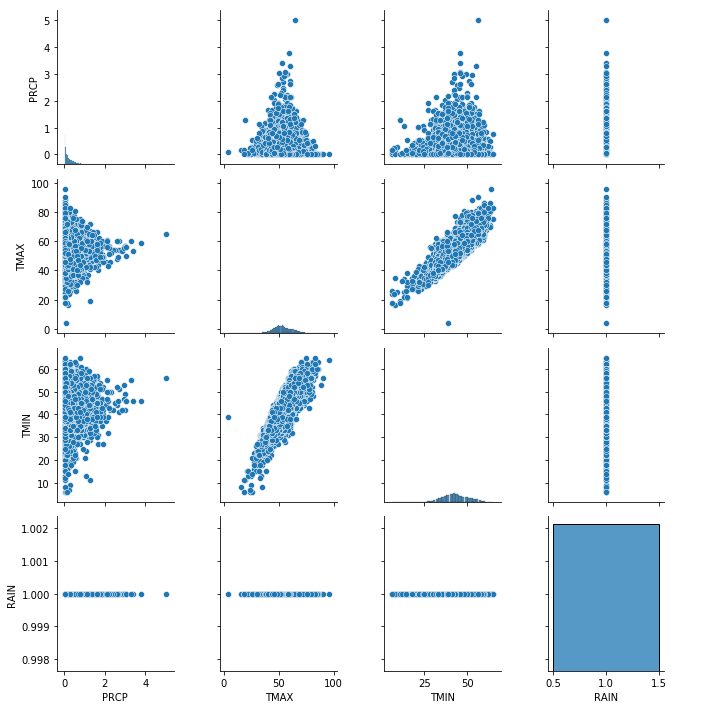

In [16]:
sns.pairplot(data=df[df['RAIN']== True])

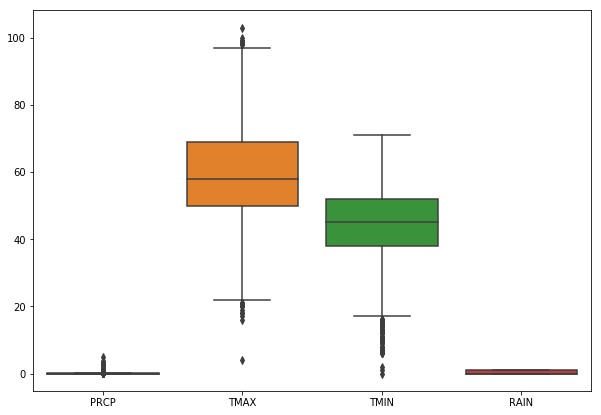

In [17]:
plt.figure(figsize=(10,7))
sns.boxplot(data=df)

## Identifying Outliers

In [18]:
# First quartile (Q1)
Q1 = np.percentile(df['TMAX'], 25, interpolation = 'midpoint')
  
# Third quartile (Q3)
Q3 = np.percentile(df['TMAX'], 75, interpolation = 'midpoint')
  
# Interquaritle range (IQR)
IQR = Q3 - Q1

# lower bound outliers --> Q1 - 1.5(IQR)
# higher bound outliers --> Q3 + 1.5 (IQR)


print(Q3+ 1.5*(IQR))

97.5


In [ ]:
#Dropping the outliers from TMIN column
df=df.drop(df[df['TMIN']<17 ].index)


In [ ]:
#Dropping the outliers from TMAX columns i.e. the value more than 100
df=df.drop(df[(df['TMAX']>97.5) | (df['TMAX']< 21.5)].index)


In [ ]:
#Dropping the outliers from PRCP columns i.e. the value more than 0.275
df=df.drop(df[(df['PRCP']>0.25) | (df['PRCP']< -0.15) ].index)

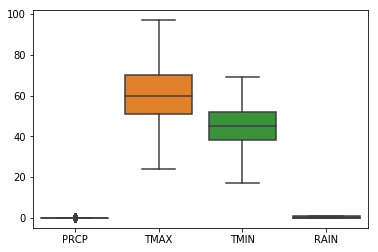

In [ ]:
sns.boxplot(data=df)

### Coding a Heuristic by hand and evaluating

conditions:
- If it rained yesterday or the day before
- if max temperature from 30 to 70 for yesterday or the day before
- if min temperature from 25 to 60 for yesterday or the day before
- if precipitation of rain range from 0.01 to 5.02 for yesterday or the day before

then it will rain today 

In [ ]:
# Reset index and drop index column
df = df.reset_index().drop("index", axis=1)

In [ ]:
# Create function to perform our heuristic
def heuristic(df):
    
    """
    Simple heuristic:
    
    If it rained yesterday or the day before, if max temperature from 30 to 70 for yesterday or the day before, if min 
    temperature from 25 to 60 for yesterday or the day before and if precipitation of rain range from 0.01 to 5.02 
    for yesterday or the day before then it will rain else predict no rain
    
    Frist two rows are predicted false be default
    """
    
    preds = []
    for x in range(len(df)):
        # If first two rows then predict false
        if x <2:
            preds.append(False)
        else:

            if ((df.iloc[x-1]["RAIN"] == True) & (df.iloc[x-2]["RAIN"] == True) &
                ((df.iloc[x-1]["TMAX"] <= 70) & (df.iloc[x-1]["TMAX"] >= 30)) &
                ((df.iloc[x-2]["TMAX"] <= 70) & (df.iloc[x-2]["TMAX"] >= 30)) &
                ((df.iloc[x-1]["TMIN"] <= 60) & (df.iloc[x-1]["TMIN"] >= 25)) &
                ((df.iloc[x-2]["TMIN"] <= 60) & (df.iloc[x-2]["TMIN"] >= 25)) &
                ((df.iloc[x-1]["PRCP"] <= 5.02) & (df.iloc[x-1]["PRCP"] >= 0.01)) &
                ((df.iloc[x-2]["PRCP"] <= 5.02) & (df.iloc[x-2]["PRCP"] >= 0.01))):
                preds.append(True)

                
            else:
                # Predict false if the above is not true
                preds.append(False)
    return preds

In [ ]:
# Apply Heuristic
df["preds"] = heuristic(df)

df.head()

In [ ]:
# Determine Accuracy

# Create function to to find values

def calc_confuse(df):
    
    "Calculate all possible results of a confusion matrix"

    # Hold all possible values and set to zero
    FP = np.zeros(len(df))
    TP = np.zeros(len(df))
    FN = np.zeros(len(df))
    TN = np.zeros(len(df))
    
    for x in range(len(df)):
        
        # True Positive
        if (df["RAIN"].iloc[x] == True) & (df["preds"].iloc[x] == True):
            TP[x] = 1
        # True Negative
        elif (df["RAIN"].iloc[x] == False) & (df["preds"].iloc[x] == False):
            TN[x] = 1
        # False Negative
        elif (df["RAIN"].iloc[x] == True) & (df["preds"].iloc[x] == False):
            FN[x] = 1
        # False Positive
        else:
            FP[x] = 1
    
    return FP, TP, FN, TN

In [ ]:
# Extract results and create columns for each
w,x,y,z = calc_confuse(df)

df["FP"] = w
df["TP"] = x
df["FN"] = y
df["TN"] = z

# Look at 10 random rows to determin accuracy
df.sample(10)

In [ ]:
# Calculate Accuracy
(sum(df["TP"]) + sum(df["TN"])) / len(df)

In [ ]:
# Baseline Model Prediction
# What would be our accuracy if we predicted the majority class

df["RAIN"].value_counts(normalize=True)